In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('Metrail+dataset.csv')
df.columns = ['Month','Travellers']
df.head()

,Month,Travellers
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [12]:
df['Month'] = pd.to_datetime(df["Month"],format='%b-%y')
df.set_index('Month',inplace=True)
df.head()

,Travellers
Month,
1991-01-01,1724.0
1991-02-01,1638.0
1991-03-01,1987.0
1991-04-01,1825.0
1991-05-01,NaN


### Imputing missing values with last observed value

In [17]:
df['Travellers_Last_Observed']=df['Travellers'].interpolate(method='pad',direction='forward')

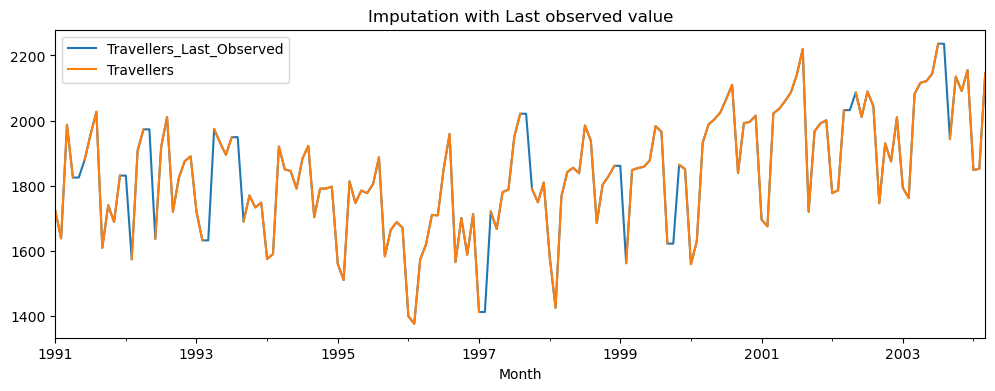

In [18]:
df['Travellers_Last_Observed'].plot(figsize=(12,4))
df['Travellers'].plot()
plt.legend(loc='best')
plt.title('Imputation with Last observed value')
plt.show()

In [19]:
## Mean of the colums
df['Travellers_Last_Observed'].mean()

1838.685534591195

### Imputing with next observed value

In [22]:
df['Travellers_Next_Observed'] = df['Travellers'].fillna(df['Travellers'].interpolate(method='backfill',direction='backwards'))
df['Travellers_Next_Observed'].mean()

1834.446540880503

### Imputing with linear interpolation

In [24]:
df['Travellers_Linear_Interpolation'] = df['Travellers'].fillna(df['Travellers'].interpolate(method='linear'))
df['Travellers_Linear_Interpolation'].mean()

1836.566037735849